# ML Classification of Pokemons as Legendary/Non-Legendary based on their characteristics.

##### Importing the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Importing dataset and display GEN1 Starters

In [2]:
df = pd.read_csv('pokemon.csv')
print("Data's shape : ", df.shape)
df.head(13)

Data's shape :  (1045, 13)


,Pokedex No.,Name,Type,Other Type,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,1,0
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,1,0
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,1,0
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,405,1,0
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,534,1,0
7,6,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,634,1,0
8,6,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,634,1,0
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,314,1,0


##### Display Legendary Pokemons

In [3]:
df[df["Legendary"]==1].head(6)

,Pokedex No.,Name,Type,Other Type,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total,Generation,Legendary
184,144,Articuno,Ice,Flying,90,85,100,95,125,85,580,1,1
185,144,Galarian Articuno,Psychic,Flying,90,85,85,125,100,95,580,1,1
186,145,Zapdos,Electric,Flying,90,90,85,125,90,100,580,1,1
187,145,Galarian Zapdos,Fighting,Flying,90,125,90,85,90,100,580,1,1
188,146,Moltres,Fire,Flying,90,100,90,125,85,90,580,1,1
189,146,Galarian Moltres,Dark,Flying,90,85,90,100,125,90,580,1,1


##### Percentage of Legendary Pokemon

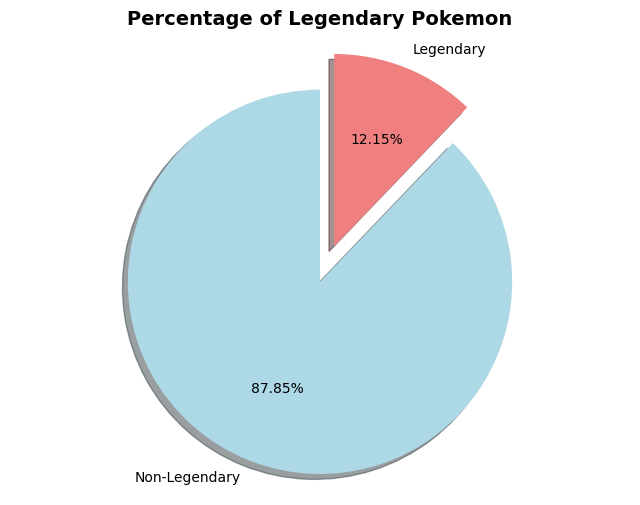

In [4]:
# Calculate the counts of Legendary and non-Legendary Pokemon
legendaries = df['Legendary'].value_counts()
legendary_counts = legendaries.values
labels = ['Non-Legendary', 'Legendary']  # Set custom labels

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the pie chart
colors = ['lightblue', 'lightcoral']
explode = (0.2, 0)  # Explode the first slice for emphasis
ax.pie(legendary_counts, labels=labels, autopct='%1.2f%%', colors=colors, shadow=True, explode=explode, startangle=90)

# Add a title
ax.set_title("Percentage of Legendary Pokemon", fontsize=14, fontweight='bold')

# Set the aspect ratio to be equal, ensuring a circular pie
ax.axis('equal')

# Display the chart
plt.show()

###### Legendaries v Non-Legendaries on Offense / Defense

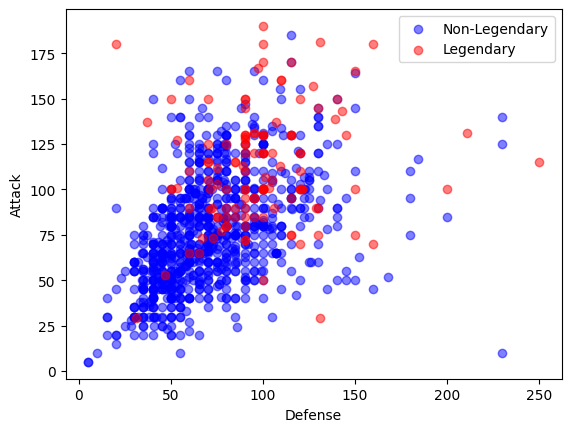

In [5]:
legendary_colors = {False: 'blue', True: 'red'}
legendary_labels = {False: 'Non-Legendary', True: 'Legendary'}

plt.scatter(df[df['Legendary'] == False]['Defense'], df[df['Legendary'] == False]['Attack'],
            c=legendary_colors[False], label=legendary_labels[False], alpha=0.5)
plt.scatter(df[df['Legendary'] == True]['Defense'], df[df['Legendary'] == True]['Attack'],
            c=legendary_colors[True], label=legendary_labels[True], alpha=0.5)

plt.xlabel('Defense')
plt.ylabel('Attack')
plt.legend()
plt.show()

##### Legendaries v Non-Legendaries on Sp. Offense / Sp. Defense

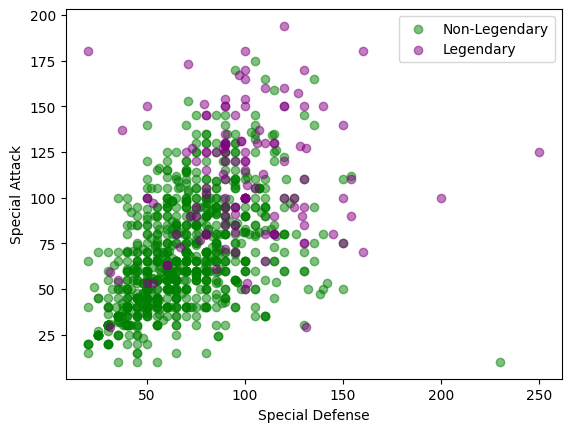

In [6]:
legendary_colors = {False: 'green', True: 'purple'}
legendary_labels = {False: 'Non-Legendary', True: 'Legendary'}

plt.scatter(df[df['Legendary'] == False]['Special Defense'], df[df['Legendary'] == False]['Special Attack'],
            c=legendary_colors[False], label=legendary_labels[False], alpha=0.5)
plt.scatter(df[df['Legendary'] == True]['Special Defense'], df[df['Legendary'] == True]['Special Attack'],
            c=legendary_colors[True], label=legendary_labels[True], alpha=0.5)

plt.xlabel('Special Defense')
plt.ylabel('Special Attack')
plt.legend()
plt.show()

##### Legendaries v Non-Legendaries on HP / Speed

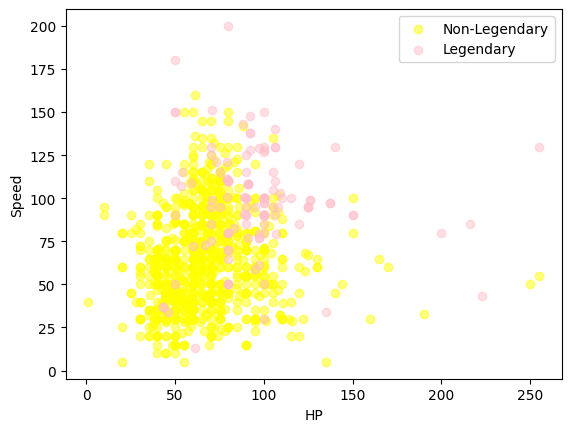

In [7]:
legendary_colors = {False: 'yellow', True: 'pink'}
legendary_labels = {False: 'Non-Legendary', True: 'Legendary'}

plt.scatter(df[df['Legendary'] == False]['HP'], df[df['Legendary'] == False]['Speed'],
            c=legendary_colors[False], label=legendary_labels[False], alpha=0.5)
plt.scatter(df[df['Legendary'] == True]['HP'], df[df['Legendary'] == True]['Speed'],
            c=legendary_colors[True], label=legendary_labels[True], alpha=0.5)

plt.xlabel('HP')
plt.ylabel('Speed')
plt.legend()
plt.show()

After a closer examination, a substantial portion of the Pokemon displayed notably elevated values along these factores (Attack, Defense, Sp. Attack, Sp. Defense, HP, Speed) axes, hinting at a potential correlation between these factors and their Legendary classification.

##### Classification

In [8]:
y = df['Legendary']
X = df[['Total', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']]

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
dt_classifier = DecisionTreeClassifier(criterion = 'gini', max_features='auto', min_samples_leaf=4, min_samples_split=15, random_state = 4)
dt_classifier.fit(X_train, y_train)

# Get the predicted values
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision : ",precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall score : ",recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1 : ",f1)

Accuracy :  0.9617834394904459
Precision :  0.7647058823529411
Recall score :  0.8666666666666667
F1 :  0.8125


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [24]:
# Get the attribute data for the test Pokemon based on its name
test_pokemon_name = "Raikou"
test_pokemon_data = df.loc[df['Name'] == test_pokemon_name, ['Total', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']].values

if len(test_pokemon_data) == 0:
    print(f"The Pokemon '{test_pokemon_name}' does not exist, or is probably misspelled !")
else:
    # Make predictions for the test Pokemon data
    prediction = dt_classifier.predict(test_pokemon_data)

    # Print the prediction
    if prediction == 1:
        print(f"The Pokemon '{test_pokemon_name}' is predicted to be Legendary.")
    else:
        print(f"The Pokemon '{test_pokemon_name}' is predicted to be Non-Legendary.")


The Pokemon 'Raikou' is predicted to be Legendary.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
